In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import math


In [81]:
df = pd.read_csv(r"C:\Users\RobDewan\Documents\ClimateChange\archive.csv")

In [82]:
df.head(5)

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


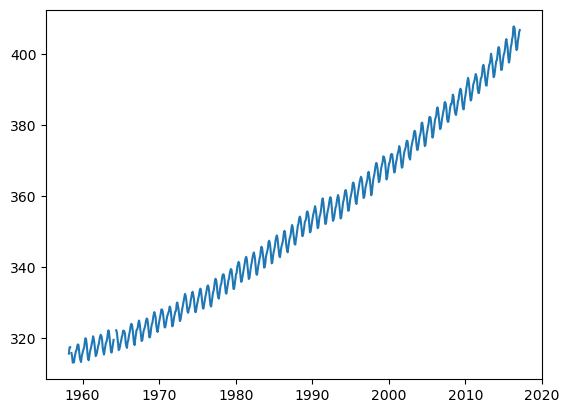

In [83]:
plt.plot(df['Decimal Date'], df['Carbon Dioxide (ppm)'])

In [84]:
# We use pd.interpolate to fix some Nan values
y = df['Carbon Dioxide (ppm)'].interpolate()
# gotta fix these others ones too
y[[0,1]] = y[[2,2]]
# We're going to run a multiple linear regression with x1 = 'Decimal Date' and x2 = 'Decimal Date'**2
X = pd.concat([df['Decimal Date'], df['Decimal Date'].apply(lambda t : t ** 2).rename("X**2")], axis = 1)


In [85]:
# We'll use these variables for plotting
t = np.linspace(1958, 2018, 100)
T_quad = np.array([t, t**2])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35)

In [87]:
lr = linear_model.LinearRegression().fit(X_train, y_train)
y_hat = lr.intercept_ + np.inner(lr.coef_, T_quad.transpose())

In [88]:
alphas_range = np.logspace(-6, 6, 13)

In [89]:
# We're going to use cross-validation again
ridge = linear_model.RidgeCV(alphas = alphas_range).fit(X_train, y_train)
lasso = linear_model.LassoCV(alphas = alphas_range).fit(X_train, y_train)

c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870.2692261889042, tolerance: 25.86449065580214
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2601.4467321704064, tolerance: 25.86449065580214
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2773.360190634205, tolerance: 25.86449065580214
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

In [90]:
ridge_alpha, lasso_alpha = ridge.alpha_, lasso.alpha_
ridge_alpha, lasso_alpha

(0.0001, 1e-06)

In [91]:
scores = lr.score(X_test, y_test), ridge.score(X_test, y_test), lasso.score(X_test, y_test)
print(scores)

(0.9935046204393398, -103.75519334044947, 0.9766215621981947)


In [92]:
# We'll use RidgeCV and LassoCV to find the best alphas to use
ridge = linear_model.Ridge(alpha = ridge_alpha).fit(X_train, y_train)
lasso = linear_model.Lasso(alpha = lasso_alpha).fit(X_train, y_train)

y_hat_ridge = ridge.intercept_ + np.inner(ridge.coef_, T_quad.transpose())
y_hat_lasso = lasso.intercept_ + np.inner(lasso.coef_, T_quad.transpose())

c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+03, tolerance: 3.392e+01
  model = cd_fast.enet_coordinate_descent(


In [95]:
lr.coef_, ridge.coef_, lasso.coef_

(array([-4.84110596e+01,  1.25605341e-02]),
 array([-4.84087732e+01,  1.25599590e-02]),
 array([7.89899116e-01, 1.85461338e-04]))

In [93]:
scores = lr.score(X_test, y_test), ridge.score(X_test, y_test), lasso.score(X_test, y_test)
print(scores)

(0.9935046204393398, 0.9935045584874949, 0.9766215621981947)


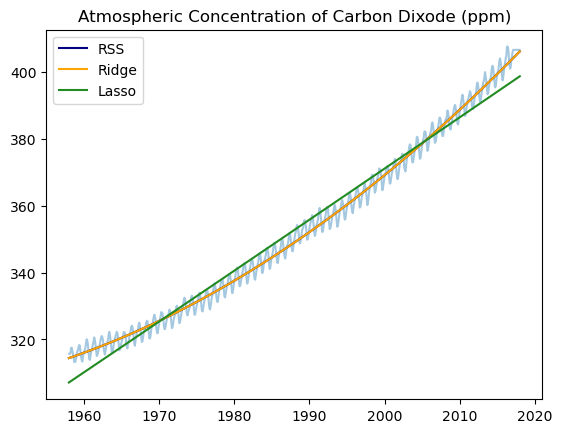

In [94]:
plt.plot(df['Decimal Date'], y, alpha = .4)
plt.plot(t, y_hat, color = 'navy', label = 'RSS')
plt.plot(t, y_hat_ridge, color = 'orange', label = 'Ridge')
plt.plot(t, y_hat_lasso, color = 'forestgreen', label = 'Lasso')
plt.title('Atmospheric Concentration of Carbon Dixode (ppm)')
plt.legend();